In [301]:
import numpy as np
import skimage
import cv2
import matplotlib.pyplot as plt
from sklearn import metrics
from skimage import measure

# Importing Training Data file which we created 

In [302]:
import pandas as pd
columns=[i for i in range(1,65)]
columns.append('Class')
Dataset=pd.read_csv(r'Image_Datac8.csv',low_memory=False,names=columns)

# Feature and Target selection from file

In [303]:
Features=[]
Target=[]
for i in range(0,51754):
    temp=[]
    for j in Dataset.iloc[i]:
        
        temp.append(j)
    Features.append(temp[:-1])
    Target.append(temp[-1])

# We use Random Forest instead of svm due to multiple classes

In [304]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(Features,Target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# Import test image and preprocess it 

In [305]:
Image=cv2.imread('DL.png')
y=70
x=25
h=200
w=400
'''your can use the crop function if every time you use same type of image whose dimensions you know '''
#Image= Image[y:y+h, x:x+w]
I=Image.copy()

#gray scale image
G_Image=cv2.cvtColor(Image,cv2.COLOR_BGR2GRAY)

#Otsu Thresholding
blur = cv2.GaussianBlur(G_Image,(1,1),0)
ret,th = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)


# preprocessed test image

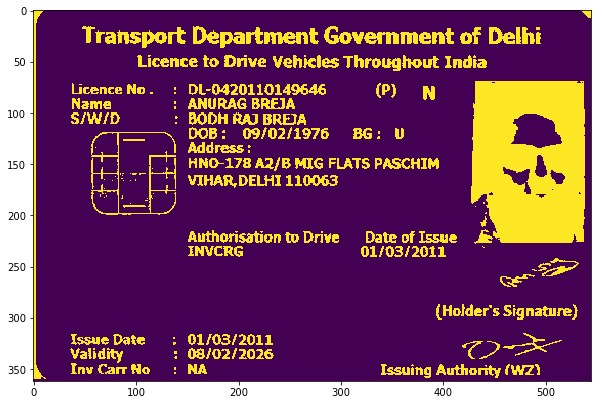

In [306]:
plt.figure(figsize=(10,10))
plt.imshow(th)
plt.show()

# Histograms of Gradients function

In [307]:
bin_n = 16
def hog(img):
    gx = cv2.Sobel(img, cv2.CV_32F, 1, 0)
    gy = cv2.Sobel(img, cv2.CV_32F, 0, 1)
    mag, ang = cv2.cartToPolar(gx, gy)

    # quantizing binvalues in (0...16)
    bins = np.int32(bin_n*ang/(2*np.pi))

    # Divide to 4 sub-squares
    bin_cells = bins[:10,:10], bins[10:,:10], bins[:10,10:], bins[10:,10:]
    mag_cells = mag[:10,:10], mag[10:,:10], mag[:10,10:], mag[10:,10:]
    hists = [np.bincount(b.ravel(), m.ravel(), bin_n) for b, m in zip(bin_cells, mag_cells)]
    hist = np.hstack(hists)
    return hist

In [308]:
#finding contours of the image
image, contours, hierarchy = cv2.findContours(th,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

In [309]:
#find x,y co-ordinate of each contour to sort contours
xy=[]
for i in contours:
    [x, y, w, h] = cv2.boundingRect(i)
    xy.append([x,y])

In [310]:
#sorting contours
a=sorted(zip(xy,contours),key= lambda x:x)

In [311]:
contours=[]
for i in a:
    contours.append(i[1])

# drawing contours on the image and appending a letter list which will contain iamge array of each letter of test image

In [312]:

letter=[]
for contour in contours:
        # get rectangle bounding contour
        [x, y, w, h] = cv2.boundingRect(contour)
        
        if h<5:
            continue
        if h>20:
            continue
        if w>10:
            #if many letter detected in one contour try to break contour box
            div=int(round(w/9))
            for i in range(1,div+1):
                cv2.rectangle(I, (x, y), (x + 9*i, y + h), (255, 0, 255), 0)
                letter.append(I[y:y+h, x:x+9*i])
            continue
        # draw rectangle around contour on original image
        cv2.rectangle(I, (x, y), (x + w, y + h), (255, 0, 255), 0)
        letter.append(I[y:y+h, x:x+w])

# Test Image with all the detected letters in image 

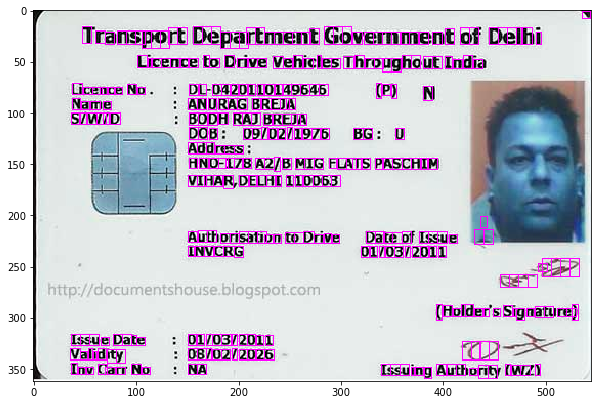

In [313]:
plt.figure(figsize=(10,10))
plt.imshow(I)
plt.show()

In [314]:
#resizing each letter to 28x28 pixels size

for l in letter:
    l=cv2.resize(l,(28,28),interpolation = cv2.INTER_AREA)

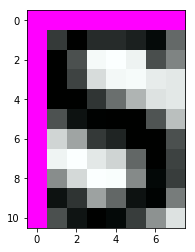

In [315]:
#example of letter 
plt.imshow(letter[1])
plt.show()

# Find Features of the all the letters indivdually

In [316]:
features=[]
for l in letter:
    features.append(hog(l))

# Predict words 

In [317]:
Detected_words=[]

Detected_words.append(RFC.predict(features))

In [318]:
'''
Issues with the OCR:-

 1.Due to the not so good dataset i acquired the accuracy is quite less here .
 2.sorting contours was not able to sort accuratly in the order of left to right and from bottom to up .
 3. detected Name ,S/W/D,date of birth and address was not found because of less accuracy and unsorted contours 
 
 '''


#Predicted Words
Detected_words


[array(['6', 'v', 'V', 'c', 'c', 'q', '6', 'V', 'T', 'v', 'p', 'H', 'e',
        'R', 'R', 'a', 'W', 'W', 'q', 'H', 'i', 'd', 'V', '4', 'u', 'o',
        'x', '0', 'W', 'o', 'c', 'c', 'n', 'W', 'g', '2', 'R', 'o', 'b',
        '0', '0', 'v', 'v', 'K', 'w', 'o', 'R', 'F', 'v', 'v', '4', 'U',
        'M', 'c', 'O', 'c', 'u', '0', 'z', '6', '6', 'v', '6', 'z', 'X',
        'R', 'W', '6', 'c', 'W', 'W', '6', '6', 'v', 'v', 'v', 'v', 'W',
        'p', 'a', 'a', 'v', 'v', 'N', 'P', 'N', 'N', 'v', '4', 'w', 'V',
        'W', '0', 'r', 'K', 'W', 'c', 'c', 'x', '6', '6', '4', 'W', 'W',
        'W', 'W', 'k', 'R', 'R', 'W', 'W', '4', 'c', '6', '6', 'x', '6',
        'k', 'W', 'v', '6', 'R', 'N', 'u', 'H', '4', 'c', 'c', 'x', 'c',
        '5', 'c', 'N', 'o', 'c', 'c', 'c', 'V', 'T', 'w', 'w', 'c', 'o',
        'c', 'W', '6', '6', 'N', '4', 'W', 'v', 'v', 'N', 'w', 'c', 'q',
        'R', 'R', 'W', 'W', 'W', 'H', '6', 'k', 'o', 'o', 'o', 'o', 'W',
        '0', 'c', '7', 'A', 'V', 'o', 'o', 'o', '0'